# Paris AirBnb Listings Analysis
## Objective 1: Data Prep & QA
- Read in the AirBnb listings Data (use low_memory=False and encoding="ISO-8859-1 in read_csv)
- Cast any date columns as a datetime format.
- Filter down the data to just listings in the city of Paris.
- QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [1]:
import pandas as pd

listings = pd.read_csv(
    "Listings.csv", 
    encoding="ISO-8859-1",
    low_memory=False,
    #parse_dates=["host_since"] 
        # I know host_since will be my main date column so I parse these dates so it doesn't load in as an object.
)

In [2]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [3]:
listings.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [29]:
# Filter dataset to Paris for this analysis
paris_listings = listings.query("city == 'Paris'")

paris_listings.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   64690 non-null  int64         
 1   name                         64627 non-null  object        
 2   host_id                      64690 non-null  int64         
 3   host_since                   64657 non-null  datetime64[ns]
 4   host_location                64522 non-null  object        
 5   host_response_time           23346 non-null  object        
 6   host_response_rate           23346 non-null  float64       
 7   host_acceptance_rate         31919 non-null  float64       
 8   host_is_superhost            64657 non-null  object        
 9   host_total_listings_count    64657 non-null  float64       
 10  host_has_profile_pic         64657 non-null  object        
 11  host_identity_verified       64657 non-null  

In [30]:
paris_listings = (
    listings
    .query("city == 'Paris'")
    .loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']] # grab columns I care about
)

paris_listings.info(memory_usage="deep")
# Index: 64690 entries (rows), 0 to 279711
# 64690 rows, when I look at the non-null counts, looks like host_since column has 33 rows where it's null

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 10.0 MB


In [7]:
paris_listings.isna().sum()
# such a small fraction of our data, I feel comfortable to ignore these in my analysis

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [8]:
paris_listings.describe()
# returns stats of numeric columns

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


### Notes:
- Min accommodates 0 is concerning. we expect each listing to accommodate, price >= 1
- This must mean data errors in both accommodates and price columns

In [9]:
# Let's count how many times these values = 0

paris_listings.query('accommodates == 0').count()
# small fraction of the listings
# safe to assume these are incomplete or data entry errors

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [10]:
paris_listings.query('price == 0').count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [11]:
paris_listings.query('price == 0 and accommodates == 0').count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

### Notes:
- Small fraction of the listings
- Safe to assume these are incomplete or data entry errors
- Less that 1/100 of our data, not going to affect our analysis


## Objective 2: Prepare for Visualization
- Create a DataFrame called `paris_listings_neighbourhood`. Group the Paris listings by neighbourhood and calculate the average price for each. Sort by price in ascending order.
- Create a DataFrame called `paris_listings_accomodations`. Filter your data down to the most expensive neighbourhood in Paris. Group it by `accomodates` and calculate the average price for each. Sort by price in ascending order.
- Finally, create a DataFrame called `paris_listings_over_time`. Group the data by the year component of `host_since`. Calculate a count of rows to get the number of new hosts for each year, and the average price of listings for each year.

In [31]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby('neighbourhood')
    .agg({'price': 'mean'})
    .sort_values('price', ascending=False)
)

paris_listings_neighbourhood.head()

,price
neighbourhood,
Elysee,210.536765
Louvre,175.379972
Passy,161.144635
Palais-Bourbon,156.856578
Luxembourg,155.638639


In [32]:
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Popincourt,90.559459
Reuilly,89.058402
Buttes-Montmartre,87.209479
Buttes-Chaumont,82.690182
Menilmontant,74.942257


In [41]:
# Let's filter by most expensive neighbourhood and explore average price & counts grouped by accomodations.
paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby('accommodates')
    .agg(
        count = ('neighbourhood', 'count'),
        avg_price = ('price', 'mean')
        
    )
    .sort_values('avg_price')
)

paris_listings_accommodates

,count,avg_price
accommodates,,
0,6,0.000000
1,90,79.522222
3,146,152.828767
2,716,155.103352
4,458,212.096070
5,82,328.817073
6,175,355.508571
8,27,405.518519
7,26,411.538462


In [42]:
paris_listings_over_time = (
    paris_listings
    .set_index('host_since')
    .resample('Y') # Group by year
    .agg(
        count = ('neighbourhood', 'count'),
        avg_price = ('price', 'mean')
    )



)

paris_listings_over_time.head()

,count,avg_price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


In [43]:
paris_listings_over_time.tail()

,count,avg_price
host_since,,
2017-12-31,4585,108.658888
2018-12-31,4294,138.209362
2019-12-31,5694,129.757113
2020-12-31,3412,141.456038
2021-12-31,133,93.488722


# Objective 3: Visualize the Data
- Build a horizontal bar chart of average rent price by neighbourhood. Which neighbourhoods stand out?
- Build a horizontal bar chart of average price by accommodates in the most expensive neighbourhood. Are the results intuitive?
- Finally, build line charts of new hosts per year and average price by year. What happened to new hosts in 2015? Was average price impacted?
- Challenge: Plot both time series in a dual axis line chart!

<Axes: title={'center': 'Average Listing aprice by Paris Neighbourhood'}, ylabel='neighbourhood'>

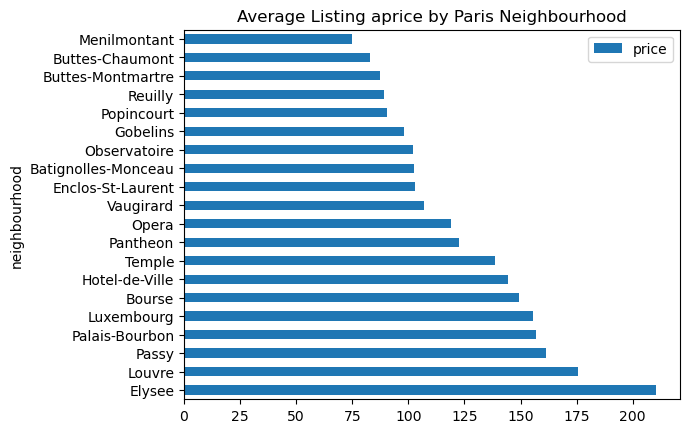

In [44]:
# We're using pandas plot api
# other optional visualization packages like seaborn, matplotlib, plotly

(paris_listings_neighbourhood
 .plot
 .barh(
 title="Average Listing aprice by Paris Neighbourhood")
)

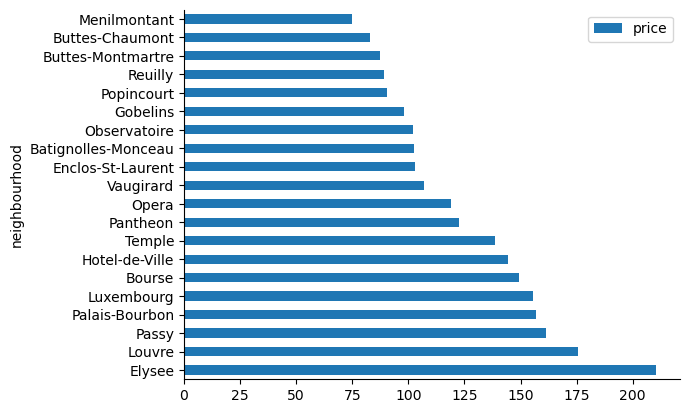

In [45]:
# lets make this prettier
import seaborn as sns

(paris_listings_neighbourhood
 .plot
 .barh()
)

sns.despine()
# remove top and right border

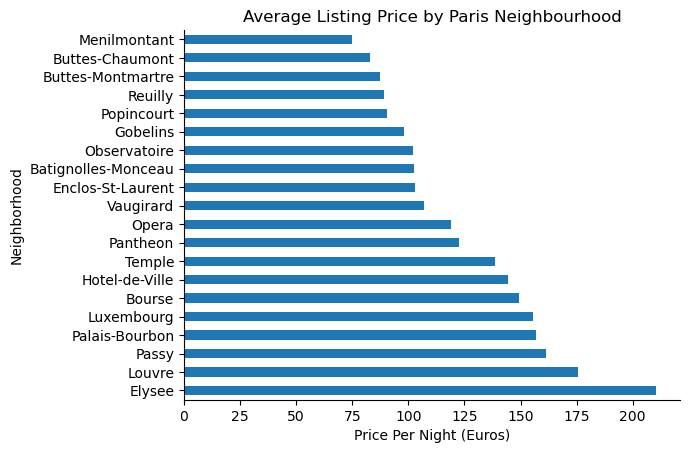

In [46]:
import seaborn as sns

(paris_listings_neighbourhood
 .plot
 .barh(
     title="Average Listing Price by Paris Neighbourhood",
     xlabel="Price Per Night (Euros)",
     ylabel="Neighborhood",
     legend=None
 )
)

sns.despine()
# remove top and right border

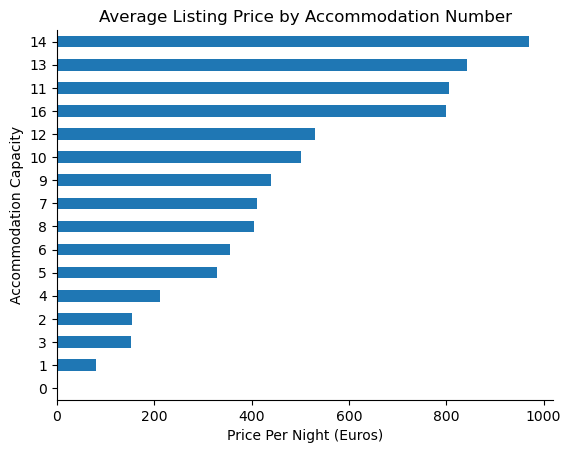

In [24]:
(paris_listings_accommodates
 .plot
 .barh(
     title="Average Listing Price by Accommodation Number",
     xlabel="Price Per Night (Euros)",
     ylabel="Accommodation Capacity",
     legend=None
 )
)

sns.despine()
# remove top and right border

In [53]:
paris_listings_over_time["count"]

host_since
2008-12-31        4
2009-12-31      106
2010-12-31      416
2011-12-31     1339
2012-12-31     4592
2013-12-31     8142
2014-12-31    10922
2015-12-31    12147
2016-12-31     8871
2017-12-31     4585
2018-12-31     4294
2019-12-31     5694
2020-12-31     3412
2021-12-31      133
Name: count, dtype: int64

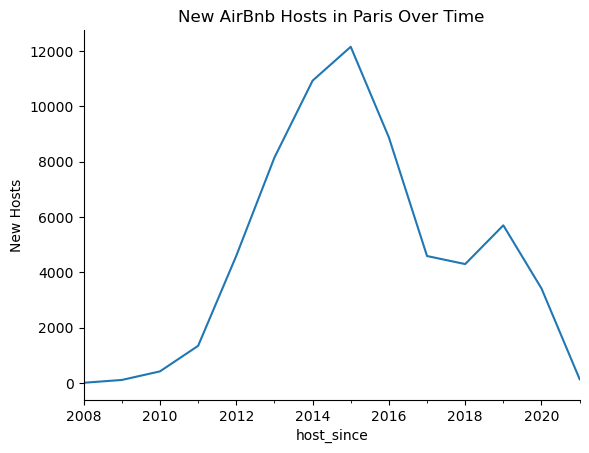

In [50]:
paris_listings_over_time["count"].plot(
    ylabel="New Hosts",
    title="New AirBnb Hosts in Paris Over Time"
)

sns.despine()

We can see when AirBnb launched there were very few hosts, but things really took off as the popularity grew to 12,000 new hosts in the city of Paris.
Around this time, regulators in the government responded to a lot of complaints.
Complaints about housing prices going up, communities started to fray.
Some of these neighbourhoods, it was very profitable to rent out your AirBnb.
So the city decided it needed to put some restrictions on who could list, how long people could list etc.
We saw that this had a pretty dramatic impact on number of new hosts.

In [52]:
paris_listings_over_time["avg_price"]

host_since
2008-12-31     77.750000
2009-12-31    159.641509
2010-12-31    125.031250
2011-12-31    124.828230
2012-12-31    111.578615
2013-12-31    107.096414
2014-12-31    100.253800
2015-12-31    103.646250
2016-12-31    114.159847
2017-12-31    108.658888
2018-12-31    138.209362
2019-12-31    129.757113
2020-12-31    141.456038
2021-12-31     93.488722
Name: avg_price, dtype: float64

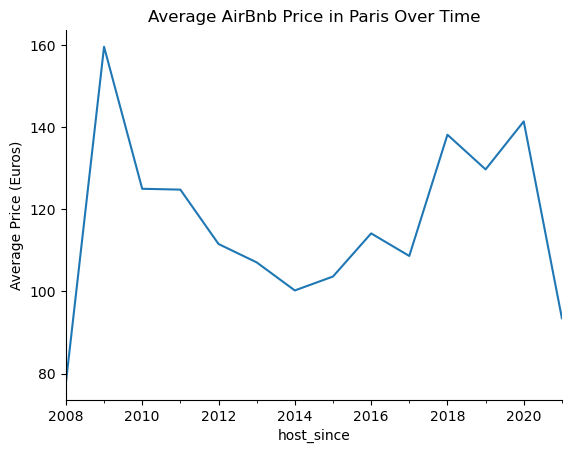

In [51]:
# Now lets examine what happened to prices in relation to this patern

paris_listings_over_time["avg_price"].plot(
    ylabel="Average Price (Euros)",
    title="Average AirBnb Price in Paris Over Time"
)

sns.despine()

So after this first year, market was still being established. As we see new hosts enter, the average price declines.
Presumably due to a lot more competition for hosts. But once those regulations went into place, and we saw fewer hosts come online, we see the average price rise again back to it's highest point right before the pandemic.

We can't really say 100% say with the data we have that this is causality.
However, I think there's a pretty strong change that the decline in new hosts took some pressure off that competition and allowed price to rise once again.

Text(0, 0.5, 'Average Price')

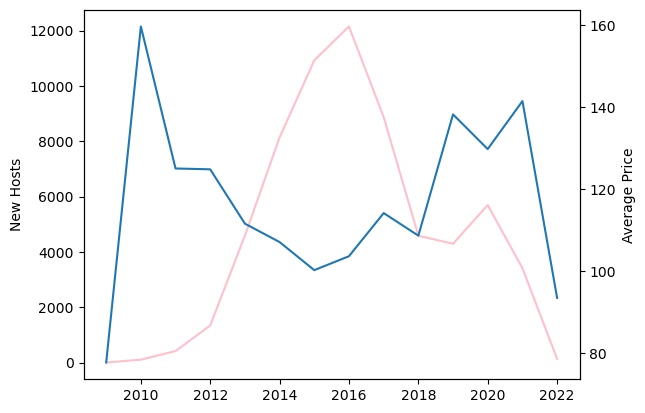

In [54]:
# I want to combine both of these line charts into one.

import matplotlib.pyplot as plt

# This creates a figure and a chart object
# Every chart is technically two objects. Theres an overall image, and theres the chart within that image
# Fig is going to he the overall image, and ax is going to be the chart within that image

fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index, # x axis
    paris_listings_over_time["count"], # y axis
    label="New Hosts",
    c="pink"
)

ax.set_ylabel("New Hosts")

# Now we need to set up our dual axis chart
# We can do that in matplotlib twinx() method
# So we're going to create a second chart within the same figure.

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index, # x axis
    paris_listings_over_time["avg_price"], # y axis
    label="Average Price",
)

ax2.set_ylabel("Average Price")


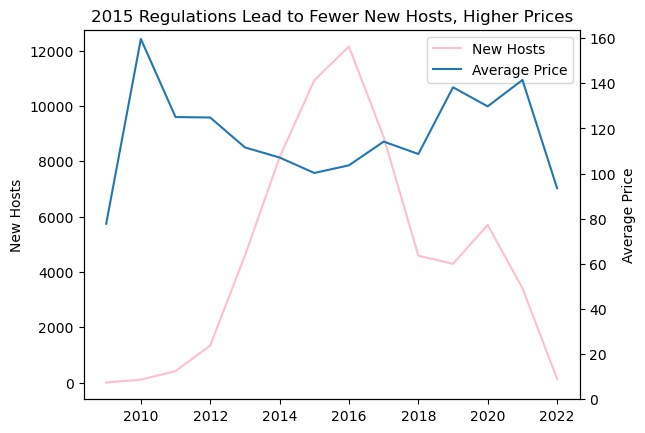

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index, # x axis
    paris_listings_over_time["count"], # y axis
    label="New Hosts",
    c="pink"
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index, # x axis
    paris_listings_over_time["avg_price"], # y axis
    label="Average Price",
)

# I saw the ax2 y axis is not set to 0 so we're going to fix that.
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")

# Add a title to provide a quick summary.
ax.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")

# Combine handles and labels from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# add the legend
ax.legend(lines + lines2, labels + labels2, loc='best') 

# show the plot
plt.show()